In [1]:
!python --version

Python 3.8.8


In [2]:
import random

import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from dataclasses import dataclass
from typing import List, Callable, Dict, Tuple, Set

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

import pickle

# import gensim
# from gensim.models import Word2Vec

# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers

In [4]:
import nltk

nltk.download('stopwords',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('omw-1.4',quiet=True)

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

In [5]:
def remove_punctuation(text):
    return re.sub('[^a-zA-Z]', '', str(text))

def remove_special_chars_and_digits(text):
    return re.sub('(\\d|\\W)+', '', text)
  
def clean_line(text,debug=False):

  line_list=str(text).split()

  if debug==True:
    print("line:",text)
    print("str(line):",str(text))
    print("split line:",line_list)

  line_list=[remove_punctuation(word.lower()) for word in line_list]
  if debug==True:
    print("cleaned split line:",line_list)
  cleaned_line= ' '.join(line_list)

  if debug==True:
    print("rejoined line:",cleaned_line)
  return cleaned_line

def remove_stop_words(in_text):
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(in_text)  
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    return filtered_sentence

# NLTK Corpus Shakespeare (.xml)

In [6]:
from nltk.corpus import shakespeare
nltk.download('shakespeare')

from xml.etree import ElementTree

[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\Jocelyn\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


In [7]:
shakespeare.fileids()

['a_and_c.xml',
 'dream.xml',
 'hamlet.xml',
 'j_caesar.xml',
 'macbeth.xml',
 'merchant.xml',
 'othello.xml',
 'r_and_j.xml']

In [8]:
play = shakespeare.xml('dream.xml')
print(play)
print()

for x in play:
  print(x)
print()

personae = [persona.text for persona in play.findall('PERSONAE/PERSONA')]
print(personae)

<Element 'PLAY' at 0x000001B142896270>

<Element 'TITLE' at 0x000001B141BBD3B0>
<Element 'PERSONAE' at 0x000001B1428A9EF0>
<Element 'SCNDESCR' at 0x000001B1428BF270>
<Element 'PLAYSUBT' at 0x000001B1428BF2C0>
<Element 'ACT' at 0x000001B1428BF360>
<Element 'ACT' at 0x000001B1428D0C20>
<Element 'ACT' at 0x000001B1428EA8B0>
<Element 'ACT' at 0x000001B14291D630>
<Element 'ACT' at 0x000001B142931630>

['THESEUS, Duke of Athens.', 'EGEUS, father to Hermia.', 'PHILOSTRATE, master of the revels to Theseus.', 'QUINCE, a carpenter.', 'SNUG, a joiner.', 'BOTTOM, a weaver.', 'FLUTE, a bellows-mender.', 'SNOUT, a tinker.', 'STARVELING, a tailor.', 'HIPPOLYTA, queen of the Amazons, betrothed to Theseus.', 'HERMIA, daughter to Egeus, in love with Lysander.', 'HELENA, in love with Demetrius.', 'OBERON, king of the fairies.', 'TITANIA, queen of the fairies.', 'PUCK, or Robin Goodfellow.', 'Other fairies attending their King and Queen.', 'Attendants on Theseus and Hippolyta.']


In [9]:
personae = [persona.text for persona in play.findall('PERSONAE/PERSONA')]
names = [persona.split(',')[0] for persona in personae]
speakers = set(speaker.text for speaker in play.findall('*/*/*/SPEAKER'))

In [10]:
shakespeare.raw('j_caesar.xml')

'<?xml version="1.0"?>\r\n<?xml-stylesheet type="text/css" href="shakes.css"?>\r\n<!-- <!DOCTYPE PLAY SYSTEM "play.dtd"> -->\r\n\r\n<PLAY>\r\n<TITLE>The Tragedy of Julius Caesar</TITLE>\r\n\r\n<!--\r\n\r\n<P>Text placed in the public domain by Moby Lexical Tools, 1992.</P>\r\n<P>XML markup by Jon Bosak, 1996-1998.</P>\r\n<P>XML Styling done by Ajay Juneja, 1999.<P>\r\n<P>This work may be freely copied and distributed worldwide.</P>\r\n\r\n-->\r\n\r\n<PERSONAE>\r\n<TITLE>Dramatis Personae</TITLE>\r\n\r\n<PERSONA>JULIUS CAESAR</PERSONA>\r\n\r\n<PGROUP>\r\n<PERSONA>OCTAVIUS CAESAR</PERSONA>\r\n<PERSONA>MARCUS ANTONIUS</PERSONA>\r\n<PERSONA>M. AEMILIUS LEPIDUS</PERSONA>\r\n<GRPDESCR>triumvirs after death of Julius Caesar.</GRPDESCR>\r\n</PGROUP>\r\n\r\n\r\n<PGROUP>\r\n<PERSONA>CICERO</PERSONA>\r\n<PERSONA>PUBLIUS</PERSONA>\r\n<PERSONA>POPILIUS LENA</PERSONA>\r\n<GRPDESCR>senators.</GRPDESCR>\r\n</PGROUP>\r\n\r\n\r\n<PGROUP>\r\n<PERSONA>MARCUS BRUTUS</PERSONA>\r\n<PERSONA>CASSIUS</PERSONA>\

In [11]:
playtitles=[]

for playxml in shakespeare.fileids():
  curr_play = shakespeare.xml(playxml)
  playtitles.append(curr_play[0].text)

print("Play Titles:")
for x in playtitles:
  print("  ",x)

Play Titles:
   The Tragedy of Antony and Cleopatra
   A Midsummer Night's Dream
   The Tragedy of Hamlet, Prince of Denmark
   The Tragedy of Julius Caesar
   The Tragedy of Macbeth
   The Merchant of Venice
   The Tragedy of Othello, the Moor of Venice
   The Tragedy of Romeo and Juliet


In [12]:
lines_all=[]
lines_each=[]

for playxml in shakespeare.fileids():
  curr_play = shakespeare.xml(playxml)
  curr_play_lines=[str(line.text) for line in curr_play.findall('*/*/*/LINE')]
  lines_each.append(curr_play_lines)
  lines_all=lines_all+curr_play_lines



print("Number of plays: ",len(playtitles))
print()
print("Lines per Play:")
for x in range(len(playtitles)):
  print(playtitles[x],":",len(lines_each[x]))

print()
print("Total lines: ",len(lines_all))

Number of plays:  8

Lines per Play:
The Tragedy of Antony and Cleopatra : 3560
A Midsummer Night's Dream : 2159
The Tragedy of Hamlet, Prince of Denmark : 4014
The Tragedy of Julius Caesar : 2596
The Tragedy of Macbeth : 2385
The Merchant of Venice : 2663
The Tragedy of Othello, the Moor of Venice : 3556
The Tragedy of Romeo and Juliet : 3093

Total lines:  24026


In [13]:
#only take the first 1800 lines from each play

fewer_lines_each=[x[:1800] for x in lines_each]

fewer_lines_all=[line for play_lines in fewer_lines_each for line in play_lines]

print("Number of lines for training:",len(fewer_lines_all))

lines_all_one=" ".join(fewer_lines_all)

Number of lines for training: 14400


In [14]:
lines_all_one=re.sub(":",".",lines_all_one)
lines_all_one=re.sub(";",".",lines_all_one)

In [15]:
sentence_tokens=nltk.sent_tokenize(lines_all_one)

In [147]:
fewer_lines_each_x=[" ".join(x) for x in fewer_lines_each]

for x in fewer_lines_each_x:
    print(len(x.split()))

print(fewer_lines_each_x[0][:20])

fewer_lines_each_x=[re.sub(":",".",x) for x in fewer_lines_each_x]
fewer_lines_each_x=[re.sub(";",".",x) for x in fewer_lines_each_x]

sentence_tokens_X=[nltk.sent_tokenize(x) for x in fewer_lines_each_x]

for x in sentence_tokens_X:
    print(len(x))


11989
13493
13104
13516
12255
14182
13298
13823
Nay, but this dotage
1452
1365
1279
1413
1322
1303
1326
1495


In [16]:
print("Number of sentences:",len(sentence_tokens))
print()

print("First 10 sentences:")
for x in range(10):
  print("   ",sentence_tokens[x])

Number of sentences: 10952

First 10 sentences:
    Nay, but this dotage of our general's O'erflows the measure.
    those his goodly eyes, That o'er the files and musters of the war Have glow'd like plated Mars, now bend, now turn, The office and devotion of their view Upon a tawny front.
    his captain's heart, Which in the scuffles of great fights hath burst The buckles on his breast, reneges all temper, And is become the bellows and the fan To cool a gipsy's lust.
    Look, where they come.
    Take but good note, and you shall see in him.
    The triple pillar of the world transform'd Into a strumpet's fool.
    behold and see.
    If it be love indeed, tell me how much.
    There's beggary in the love that can be reckon'd.
    I'll set a bourn how far to be beloved.


In [17]:
#subsitute common conjunctions

def sub_conjunctions(given_sentence,debug=False):

  unconjunc=str(given_sentence)

  unconjunc=re.sub("I'm","I am",unconjunc)
  for x in ["She","He","It","Who","What","Where","There"]:
    y=''.join([x,"'s"])
    z=' '.join([x.lower(),"is"])
    unconjunc=re.sub(y,z,unconjunc,flags=re.IGNORECASE)

  unconjunc=re.sub("'ll"," will",unconjunc)
  unconjunc=re.sub("'ve"," have",unconjunc)
  unconjunc=re.sub("n't"," not",unconjunc)
  unconjunc=re.sub("'re"," are",unconjunc)

  # these are Shakespeare-specific
  unconjunc=re.sub("O'er","over",unconjunc,flags=re.IGNORECASE)

  return unconjunc


# example

ex_sent="But if I'm here, then where's she?"

subbed_ex=sub_conjunctions(ex_sent)
print(subbed_ex)

But if I am here, then where is she?


In [18]:
def clean_sentence(given_sentence,trunc=0):
  cleaned_s=str(given_sentence)

  cleaned_s=sub_conjunctions(cleaned_s)

  cleaned_s=cleaned_s.split()
  cleaned_s=[remove_special_chars_and_digits(x) for x in cleaned_s]

  #lowercase everything except 'I'
  cleaned_s=[x if x=="I" else x.lower() for x in cleaned_s]

  if trunc==1:
    print("Cannot truncate to 1 token each; no truncation being done")
  elif trunc>1:
    #truncate to a maxmum number of terms
    cleaned_s=cleaned_s[:trunc]

  cleaned_s=' '.join(cleaned_s)

  return cleaned_s

# example
ex_sent="But if I'm Here, Then where's she?"

cleaned_ex=clean_sentence(ex_sent)
print(cleaned_ex)

but if I am here then where is she


In [19]:
cleaned_sentence_tokens=[clean_sentence(x,trunc=20) for x in sentence_tokens]

for x in range(10):
    print("Original sentence:",sentence_tokens[x])
    print("Cleaned sentence:",cleaned_sentence_tokens[x])
    print()

Original sentence: Nay, but this dotage of our general's O'erflows the measure.
Cleaned sentence: nay but this dotage of our generals overflows the measure

Original sentence: those his goodly eyes, That o'er the files and musters of the war Have glow'd like plated Mars, now bend, now turn, The office and devotion of their view Upon a tawny front.
Cleaned sentence: those his goodly eyes that over the files and musters of the war have glowd like plated mars now bend

Original sentence: his captain's heart, Which in the scuffles of great fights hath burst The buckles on his breast, reneges all temper, And is become the bellows and the fan To cool a gipsy's lust.
Cleaned sentence: his captains heart which in the scuffles of great fights hath burst the buckles on his breast reneges all temper

Original sentence: Look, where they come.
Cleaned sentence: look where they come

Original sentence: Take but good note, and you shall see in him.
Cleaned sentence: take but good note and you shall s

In [20]:
fitted_tokenizer = Tokenizer()
fitted_tokenizer.fit_on_texts(cleaned_sentence_tokens)

NameError: name 'cleaned_sentence_tokens' is not defined

In [21]:
sentence_sequences=[]
n_gram_sequences=[]

for x in cleaned_sentence_tokens:
    token_list = fitted_tokenizer.texts_to_sequences([x])[0]
    
    if len(token_list)>1:
        sentence_sequences.append(token_list)

        for y in range(1,len(token_list)):
            n_gram_sequence = token_list[:y+1]
            n_gram_sequences.append(n_gram_sequence)

In [22]:
print(cleaned_sentence_tokens[0])
print(sentence_sequences[0])


for x in range(len(sentence_sequences[0])-1):
  print("  ",n_gram_sequences[x])

nay but this dotage of our generals overflows the measure
[167, 19, 21, 2283, 5, 39, 1856, 4267, 1, 634]
   [167, 19]
   [167, 19, 21]
   [167, 19, 21, 2283]
   [167, 19, 21, 2283, 5]
   [167, 19, 21, 2283, 5, 39]
   [167, 19, 21, 2283, 5, 39, 1856]
   [167, 19, 21, 2283, 5, 39, 1856, 4267]
   [167, 19, 21, 2283, 5, 39, 1856, 4267, 1]
   [167, 19, 21, 2283, 5, 39, 1856, 4267, 1, 634]


Max sequence length: 20
Number of sequences: 86290



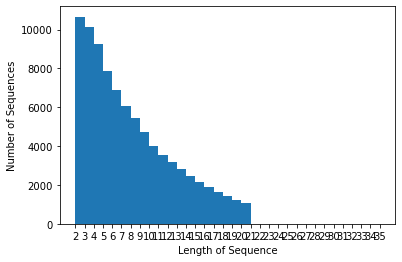

In [23]:
print("Max sequence length:",max([len(x) for x in n_gram_sequences]))
print("Number of sequences:",len(n_gram_sequences))
print()

fig, ax = plt.subplots()
ax.hist([len(x) for x in n_gram_sequences],bins=range(2,36,1))
plt.xticks(list(range(2,36)))
plt.xlabel('Length of Sequence')
plt.ylabel('Number of Sequences')

plt.show()

In [24]:
fewer_ngram_seqs=random.choices(n_gram_sequences,k=30000)

print("Using fewer ngram sequences")
print("Number of sequences being used:", len(fewer_ngram_seqs))

Using fewer ngram sequences
Number of sequences being used: 30000


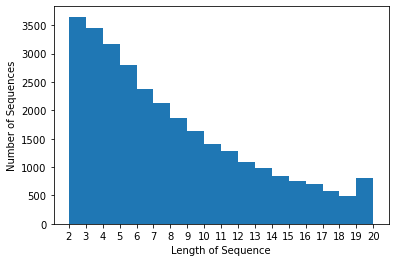

In [25]:
fig, ax = plt.subplots()
ax.hist([len(x) for x in fewer_ngram_seqs],bins=range(2,21,1))
plt.xticks(list(range(2,21)))
plt.xlabel('Length of Sequence')
plt.ylabel('Number of Sequences')

plt.show()

In [26]:
#pad sequences
paddded_ngrams=np.array(pad_sequences(fewer_ngram_seqs, maxlen=20, padding='pre'))

for x in range(5):
  print(len(fewer_ngram_seqs[x]),"terms: ",fewer_ngram_seqs[x])
  print(len(paddded_ngrams[x]),"terms:",paddded_ngrams[x])
  print()

7 terms:  [3, 31, 20, 1848, 35, 9, 509]
20 terms: [   0    0    0    0    0    0    0    0    0    0    0    0    0    3
   31   20 1848   35    9  509]

13 terms:  [61, 4234, 270, 5, 129, 2614, 1, 2068, 4235, 18, 73, 1228, 16]
20 terms: [   0    0    0    0    0    0    0   61 4234  270    5  129 2614    1
 2068 4235   18   73 1228   16]

7 terms:  [3, 49, 569, 84, 102, 6, 30]
20 terms: [  0   0   0   0   0   0   0   0   0   0   0   0   0   3  49 569  84 102
   6  30]

5 terms:  [3, 130, 42, 189, 46]
20 terms: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3 130  42
 189  46]

5 terms:  [76, 8145, 2, 2853, 1193]
20 terms: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0   76 8145    2 2853 1193]



In [27]:
total_word_tokens=len(fitted_tokenizer.word_index) + 1

print("Number of tokens:",total_word_tokens)

Number of tokens: 8987


In [28]:
predictors= paddded_ngrams[:,:-1]
next_word=     paddded_ngrams[:,-1]

print(predictors[-5:])
print()
print(next_word[-5:])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0   37   83   20]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 1761]
 [   0    0    0   19    4    9  259  144    3   49 1360   59    2    4
     1 1275  870   13    8]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 1079]
 [   0    0    0    0    0    0    0    0    0    0    0 3267   46  782
  2911 8928  102   11 8929]]

[ 55   2   7   6 122]


In [29]:
labels=to_categorical(next_word,num_classes=total_word_tokens)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(predictors, next_word, test_size=0.2, random_state=42)

In [31]:
i=0
j=["X_train", "y_train", "X_test", "y_test"]

for z in (X_train, y_train, X_test, y_test):
    print(j[i],"length:",len(z))
    i=i+1

X_train length: 24000
y_train length: 24000
X_test length: 6000
y_test length: 6000


In [32]:
model4 = Sequential()
model4.add(Embedding(total_word_tokens, 128, mask_zero=True))
model4.add(Bidirectional(LSTM(128, return_sequences = True, dropout=0.2)))
model4.add(Bidirectional(LSTM(64, return_sequences = True, dropout=0.2)))
model4.add(Bidirectional(LSTM(32, dropout=0.2)))
model4.add(Dense(total_word_tokens/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model4.add(Dense(total_word_tokens, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model4_history=model4.fit(
    predictors, 
    labels,
    epochs=150, 
    # verbose=1, 
    validation_split=0.25,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
    )

Epoch 1/150
704/704 [==============================] - 358s 478ms/step - loss: 6.9776 - accuracy: 0.0307 - val_loss: 6.7375 - val_accuracy: 0.0348
Epoch 2/150
704/704 [==============================] - 311s 441ms/step - loss: 6.4468 - accuracy: 0.0339 - val_loss: 6.7904 - val_accuracy: 0.0333
Epoch 3/150
704/704 [==============================] - 314s 446ms/step - loss: 6.2553 - accuracy: 0.0382 - val_loss: 6.7300 - val_accuracy: 0.0427
Epoch 4/150
704/704 [==============================] - 333s 473ms/step - loss: 6.0683 - accuracy: 0.0469 - val_loss: 6.8717 - val_accuracy: 0.0501
Epoch 5/150
704/704 [==============================] - 314s 446ms/step - loss: 5.9021 - accuracy: 0.0580 - val_loss: 6.8940 - val_accuracy: 0.0519
Epoch 6/150
704/704 [==============================] - 344s 489ms/step - loss: 5.7601 - accuracy: 0.0665 - val_loss: 6.9694 - val_accuracy: 0.0575
Epoch 7/150
704/704 [==============================] - 329s 467ms/step - loss: 5.6291 - accuracy: 0.0749 - val_loss: 7

In [34]:
model4.save_weights('model4_weights.h5')
model4.save('model4.h5')

In [132]:
m4_hist_df=pd.DataFrame(model4_history.history)
hist_csv_file = 'model4_history.csv'
with open(hist_csv_file, mode='w') as f:
    m4_hist_df.to_csv(f)

In [135]:
del model4 m4_hist_df, model4_history

In [36]:
model5 = Sequential()
model5.add(Embedding(total_word_tokens, 64, mask_zero=True))
model5.add(Bidirectional(LSTM(64, return_sequences = True, dropout=0.2)))
model5.add(Bidirectional(LSTM(32, dropout=0.2)))
model5.add(Dense(total_word_tokens/2, activation='relu'))
model5.add(Dense(total_word_tokens, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model5_history=model5.fit(
    predictors, 
    labels,
    epochs=150, 
    # verbose=1, 
    validation_split=0.25,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
    )

Epoch 1/150
704/704 [==============================] - 166s 224ms/step - loss: 6.9041 - accuracy: 0.0327 - val_loss: 6.5948 - val_accuracy: 0.0355
Epoch 2/150
704/704 [==============================] - 154s 219ms/step - loss: 6.2668 - accuracy: 0.0488 - val_loss: 6.4781 - val_accuracy: 0.0623
Epoch 3/150
704/704 [==============================] - 154s 219ms/step - loss: 5.8345 - accuracy: 0.0720 - val_loss: 6.6488 - val_accuracy: 0.0733
Epoch 4/150
704/704 [==============================] - 154s 219ms/step - loss: 5.4066 - accuracy: 0.0929 - val_loss: 6.6041 - val_accuracy: 0.0828
Epoch 5/150
704/704 [==============================] - 156s 221ms/step - loss: 4.9720 - accuracy: 0.1168 - val_loss: 6.9093 - val_accuracy: 0.0813
Epoch 6/150
704/704 [==============================] - 154s 219ms/step - loss: 4.4758 - accuracy: 0.1544 - val_loss: 7.3308 - val_accuracy: 0.0904
Epoch 7/150
704/704 [==============================] - 155s 220ms/step - loss: 3.9331 - accuracy: 0.2130 - val_loss: 7

In [38]:
model5.save_weights('model5_weights.h5')
model5.save('model5.h5')

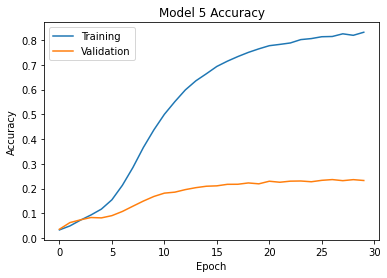

In [40]:
plt.plot(model5_history.history['accuracy'])
plt.plot(model5_history.history['val_accuracy'])
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [131]:
m5_hist_df=pd.DataFrame(model5_history.history)
hist_csv_file = 'model5_history.csv'
with open(hist_csv_file, mode='w') as f:
    m5_hist_df.to_csv(f)

In [150]:
print(list(m5_hist_df.loss))

[6.904121398925781, 6.266810417175293, 5.83447790145874, 5.406571388244629, 4.972014427185059, 4.475766181945801, 3.933098554611206, 3.377720832824707, 2.8664777278900146, 2.4528756141662598, 2.1229751110076904, 1.8634628057479858, 1.6357219219207764, 1.4723759889602661, 1.3350988626480103, 1.20880126953125, 1.1124813556671143, 1.0348577499389648, 0.9657375812530518, 0.8975326418876648, 0.8514688611030579, 0.8203221559524536, 0.7909391522407532, 0.7404127717018127, 0.7226034998893738, 0.6970183849334717, 0.6920727491378784, 0.6510250568389893, 0.664993166923523, 0.6189374923706055]


In [137]:
with open('m5_tokenizer.pickle', 'wb') as handle:
    pickle.dump(fitted_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [43]:
seed_texts = ["i think","caesar was","juliet is","i love","what a"]

In [105]:
def predict_next(seed_text,number_of_words,debug=False):

    next_words = number_of_words
    
    seed_predicted=seed_text
    old_output_word=''

    for _ in range(next_words):
        token_list = fitted_tokenizer.texts_to_sequences([seed_predicted])[0]
        token_list = pad_sequences([token_list], maxlen=19, padding='pre')
        predicted = model5.predict_classes(token_list, verbose=0)
        output_word = ""
        for word, index in fitted_tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        if old_output_word==output_word:
            break
        seed_predicted += " " + output_word
        old_output_word=output_word

    seed_predicted = (seed_predicted + ".").capitalize()
    return(seed_predicted)

In [47]:
predicted_seeds=[]

for x in range(5):
    predicted_seeds.append(predict_next(seed_texts[x],10))
    
print(predicted_seeds)

['I think the good business of all name and name and portia.', 'Caesar was turnd that in mexico known to make you yourself love.', 'Juliet is no more to tell my love and in his issue.', 'I love thee not speak the man and go so soundly so.', 'What a full of work did be may but from my son.']


In [106]:
more_predictions=[]

more_seeds=["romeo and juliet","where is","who is","cleopatra was"]

for x in more_seeds:
    y= predict_next(x,10)
    more_predictions.append(y)
    print(y)


Romeo and juliet gave the deed of wit upon caesar free and caesar.
Where is metellus my thought now pays her deed until would set.
Who is born to you left total.
Cleopatra was this that the sway and done doth old beloved these.
